In [1]:
from pandas import read_csv
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [39]:
#Memanggil dataset
filename ='c:/tugas_sdt/pima-indians-diabetes.data.csv'
names=['preg','plas','pres','skin','test','mass','pedi','age','class']
dataframe=read_csv(filename,names=names)
dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
#Insert data ke dalam array
array =dataframe.values
X = array[:,0:8] #slicing dataframe ke dalam array
Y = array[:,8]

In [41]:
#Create Pipeline
estimators = []
estimators.append(('DT',DecisionTreeClassifier()))
estimators.append(('LR',LogisticRegression(solver='lbfgs', max_iter=400)))
estimators.append(('SVC',SVC()))
#model = Pipeline(estimators)
#print(model)

In [42]:
#solver='lbfgs', max_iter=400
results=[]
names=[]
scoring='accuracy'
for name,model, in estimators:
    kfold=KFold(n_splits=10,random_state=7,shuffle=True)
    cv_result=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
    results.append(cv_result)
    names.append(name)
    msg="%s: %f (%f) "% (name,cv_result.mean(),cv_result.std())
    print(msg)

DT: 0.686329 (0.045860) 
LR: 0.772163 (0.049684) 
SVC: 0.760458 (0.034712) 


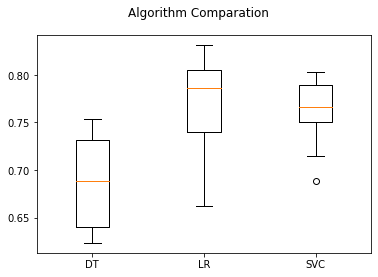

In [43]:
#Visualisation using Boxplot for Comparation
from matplotlib import pyplot
fig = pyplot.figure()
fig.suptitle('Algorithm Comparation')

ax = fig.add_subplot(111)
pyplot.boxplot (results)
ax.set_xticklabels(names)
pyplot.show()